In [1]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
from functools import partial
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

results = {}

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    d = data
    w = weights
    return (d * w**-2).sum() / (w**-2).sum()

def error_with_weights(weights):
    w = weights
    return 1 / math.sqrt((w**-2).sum())

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

In [2]:
n = np.array([
    -4,
    -3,
    -2,
    -1,
    0,
    1,
    2,
    3,
    4
])

l = 632.8e-9

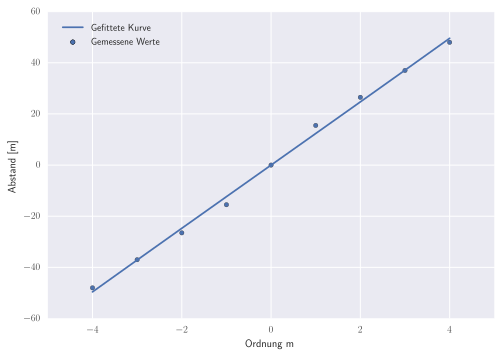

In [3]:
# ------ S P A L T 3 0 u m ------ #
x = [
    -48,
    -37,
    -26.5,
    -15.5,
    0,
    15.5,
    26.5,
    37,
    48
]
f = 550

def diffraction(n, b):
    return f * np.tan(np.arcsin(n*l/b))

v, covar = curve_fit(diffraction, n, x)

b30 = v[0]
f30 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(n, diffraction(n, v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('b30.png')
plt.show()

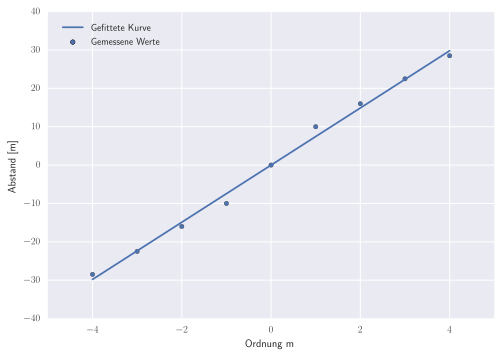

In [4]:
# ------ S P A L T 1 0 0 u m ------ #
b = 100e-6 #m

x = [
    -28.5,
    -22.5,
    -16,
    -10,
    0,
    10,
    16,
    22.5,
    28.5
]
f = 1000

def diffraction(n, b):
    return f * np.tan(np.arcsin(n*l/b))

v, covar = curve_fit(diffraction, n, x)

b100 = v[0]
f100 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(n, diffraction(n, v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('spalt100.png')
plt.show()

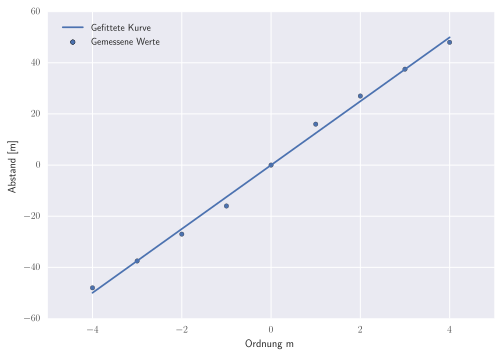

In [5]:
# ------ A N T I S P A L T 1 2 4 u m ------ #
b = 124e-6 #m

x = [
    -48,
    -37.5,
    -27,
    -16,
    0,
    16,
    27,
    37.5,
    48
]
f = 2030

def diffraction(n, b):
    return f * np.tan(np.arcsin(n*l/b))

v, covar = curve_fit(diffraction, n, x)

b124 = v[0]
f124 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(n, diffraction(n, v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('antispalt124.png')
plt.show()

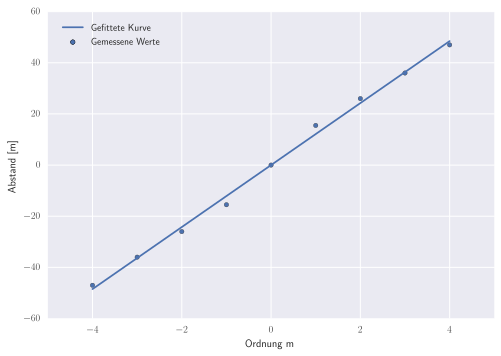

In [6]:
# ------ A N T I S P A L T H A A R ------ #
b = 50e-6 #m

x = [
    -47,
    -36,
    -26,
    -15.5,
    0,
    15.5,
    26,
    36,
    47,
]
f = 1000

def diffraction(n, b):
    return f * np.tan(np.arcsin(n*l/b))

v, covar = curve_fit(diffraction, n, x)

bhaar = v[0]
fhaar = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(np.linspace(n[0], n[-1], 1000), diffraction(np.linspace(n[0], n[-1], 1000), v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('haar.png')
plt.show()

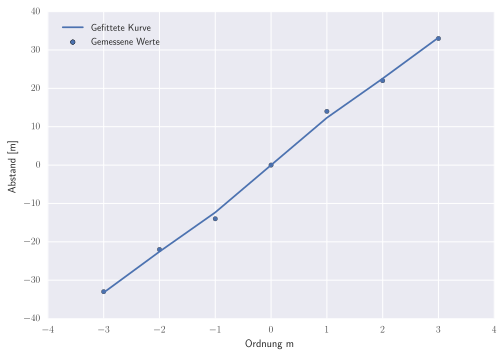

In [7]:
# ------ L O C H 1 5 0 u m ------ #
b = 150e-6 #m

n = np.array([
    -3,
    -2,
    -1,
    0,
    1,
    2,
    3
])

x = [
    -33,
    -22,
    -14,
    0,
    14,
    22,
    33
]
f = 2030

def diffraction(n, b):
    t = np.array([1, 1.22, 2.232, 3.288])
    return f * np.tan(np.arcsin(np.sign(n)*t[np.abs(n)]*l/b))

v, covar = curve_fit(diffraction, n, x)

b150 = v[0]
f150 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(n, diffraction(n, v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('loch150.png')
plt.show()

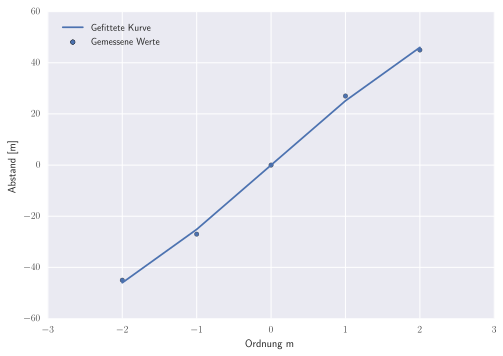

In [8]:
# ------ L O C H 7 5 u m ------ #
b = 75e-6 #m

n = np.array([
    -2,
    -1,
    0,
    1,
    2
])

x = [
    -45,
    -27,
    0,
    27,
    45
]
f = 2030

def diffraction(n, b):
    t = np.array([1, 1.22, 2.232, 3.288])
    return f * np.tan(np.arcsin(np.sign(n)*t[np.abs(n)]*l/b))

v, covar = curve_fit(diffraction, n, x)

b75 = v[0]
f75 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(n, diffraction(n, v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('loch75')
plt.show()

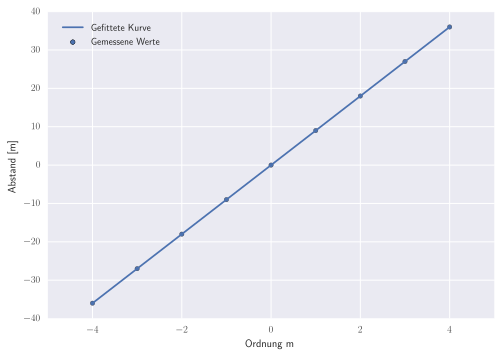

In [9]:
# ------ P E R I O D I S C H O 50 W 1 0 4 u m ------ #
b = 50e-6 #m

n = np.array([
    -4,
    -3,
    -2,
    -1,
    0,
    1,
    2,
    3,
    4
])

x = [
    -36,
    -27,
    -18,
    -9,
    0,
    9,
    18,
    27,
    36
]
f = 2030

def diffraction(n, b):
    return f * np.tan(np.arcsin(n*l/b))

v, covar = curve_fit(diffraction, n, x)

b50 = v[0]
f50 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(n, diffraction(n, v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('periodic154.png')
plt.show()

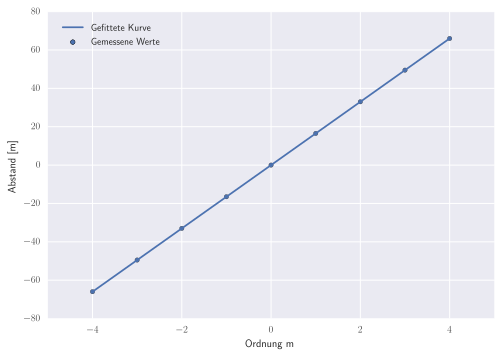

In [10]:
# ------ P E R I O D I S C H O 28 W 5 0 u m ------ #
b = 28e-6 #m

x = [
    -66,
    -49.5,
    -33,
    -16.5,
    0,
    16.5,
    33,
    49.5,
    66
]
f = 2030

def diffraction(n, b):
    return f * np.tan(np.arcsin(n*l/b))

v, covar = curve_fit(diffraction, n, x)

b28 = v[0]
f28 = np.sqrt(np.diag(covar))[0]

plt.scatter(n, x, label='Gemessene Werte')
plt.plot(np.linspace(n[0], n[-1], 1000), diffraction(np.linspace(n[0], n[-1], 1000), v), label='Gefittete Kurve')
plt.xlabel('Ordnung m')
plt.ylabel('Abstand [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.savefig('periodic78.png')
plt.show()

In [22]:
sy = 0.5
sx = 5

x = 550
y = 66

sd = math.sqrt(
    (4*l*x/(y**2*math.sqrt((y**2 / x**2) + 1)) * sy)**2 +
    (4*l/(y*math.sqrt((y**2 / x**2) + 1)) * sx)**2
)
print(sd)

print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b30, f30, math.sqrt(sd**2+f30**2), math.sqrt(sd**2+f30**2)/b30*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b100, f100, math.sqrt(sd**2+f100**2), math.sqrt(sd**2+f100**2)/b100*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b124, f124, math.sqrt(sd**2+f124**2), math.sqrt(sd**2+f124**2)/b124*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(bhaar, fhaar, math.sqrt(sd**2+fhaar**2), math.sqrt(sd**2+fhaar**2)/bhaar*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b150, f150, math.sqrt(sd**2+f150**2), math.sqrt(sd**2+f150**2)/b150*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b75, f75, math.sqrt(sd**2+f75**2), math.sqrt(sd**2+f75**2)/b75*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b50, f50, math.sqrt(sd**2+f50**2), math.sqrt(sd**2+f50**2)/b50*100))
print('{:.2E}±{:.2E}, {:.2E}, {:2f}'.format(b28, f28, math.sqrt(sd**2+f28**2), math.sqrt(sd**2+f28**2)/b28*100))

2.478343943738221e-07
2.82E-05±5.78E-07, 6.29E-07, 2.229621
8.50E-05±2.26E-06, 2.28E-06, 2.678183
1.03E-04±2.40E-06, 2.41E-06, 2.340610
5.23E-05±1.15E-06, 1.17E-06, 2.243173
1.27E-04±2.19E-06, 2.21E-06, 1.736531
6.23E-05±1.26E-06, 1.28E-06, 2.052618
1.43E-04±2.42E-09, 2.48E-07, 0.173625
7.79E-05±4.43E-09, 2.48E-07, 0.318261


# Fehlerrechnung

Wir schätzen, dass die Brennweite f nur auf 5mm genau eigestellt wurde, da die Linsenmitte nicht immer korrekt eingestellt werden konnte. Zudem war auch sonst die Anlage ein wenig schwer zu vermessen.
Zudem nehmen wir an dass wir die Interferenzmuster auf 0.5mm genau ausmessen konnten.

Damit müssen wir die Formel für den Fit

d = l/(sin(tan^-1(f/y))

nach f, der einzigen gemessenen Grösse ableiten was

derive d = l/(sin(tan^-1(f/y))

ergibt.

Somit ergibt sich dann der fortgepflanzte Fehler als 

s_d = sqrt((dd/dy*s_y)^2 + (dd/df*s_f)^2)

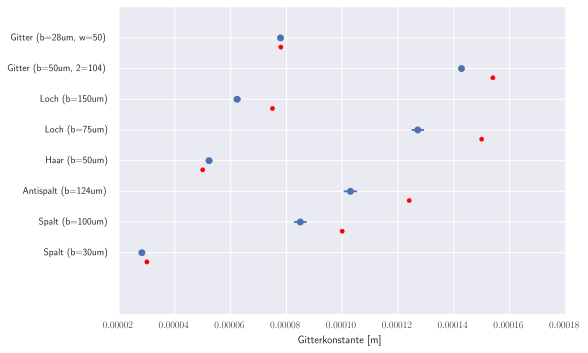

In [25]:
x1 = [
    b30,
    b100, 
    b124, 
    bhaar,
    b150, 
    b75,
    b50,
    b28
]
x2 = [
    30e-6,
    100e-6, 
    124e-6, 
    50e-6,
    150e-6, 
    75e-6,
    154e-6,
    78e-6
]
xerr = [
    math.sqrt(sd**2+f30**2),
    math.sqrt(sd**2+f100**2),
    math.sqrt(sd**2+f124**2),
    math.sqrt(sd**2+fhaar**2),
    math.sqrt(sd**2+f150**2),
    math.sqrt(sd**2+f75**2),
    math.sqrt(sd**2+f50**2),
    math.sqrt(sd**2+f28**2),
]
labels=[
    'Spalt (b=30um)',
    'Spalt (b=100um)',
    'Antispalt (b=124um)',
    'Haar (b=50um)',
    'Loch (b=75um)',
    'Loch (b=150um)',
    'Gitter (b=50um, 2=104)',
    'Gitter (b=28um, w=50)',
]
y1 = np.linspace(1, 8, 8)
y2 = np.linspace(0.7, 7.7, 8)
plt.errorbar(x1, y1, xerr=xerr, fmt='o', label='errechnet')
plt.scatter(x2, y2, color='red', label='Soll')
plt.yticks(y1, labels, rotation='horizontal')
plt.ylim((-1, 9))
plt.xlabel('Gitterkonstante [m]')
plt.savefig('results.png')
plt.show()